In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler
import glob

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the composition data
composition_data = pd.read_excel('./Al_data/7000_Al.xlsx', header=0, sheet_name="Sheet3")
composition_data = composition_data.drop('class', axis=1)
composition_data.fillna(0, inplace=True)
composition_data = composition_data.apply(pd.to_numeric, errors='coerce')

# Normalize the composition data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_composition_data = scaler.fit_transform(composition_data)

normalized_composition_data


array([[ 1.00000000e+00,  7.47899160e-01, -6.98113208e-01,
         9.03225806e-01, -6.36363636e-01,  3.18181818e-01,
         6.00000000e-01,  2.86956522e-01, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-2.45283019e-01, -9.32773109e-01, -7.45283019e-01,
        -5.48387097e-01, -4.54545455e-01,  9.09090909e-02,
         6.00000000e-01,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-8.11320755e-01, -9.95798319e-01, -7.45283019e-01,
        -6.45161290e-02,  6.36363636e-01, -1.36363636e-01,
        -6.00000000e-01, -2.69565217e-01,  0.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.88679245e-02, -9.74789916e-01, -6.98113208e-01,
        -1.29032258e-01,  6.36363636e-01,  3.18181818e-01,
        -4.40000000e-01, -2.17391304e-01, -6.66666667e-02,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [ 3.20754717e-01, -2.18487395e-01, -8.8679245

In [6]:
composition_data

,Cr,Cu,Fe,Mg,Mn,Si,Ti,Zn,Zr,Ni,V,O
0,0.265,2.100,0.200,3.00,0.100,0.175,0.100,7.40,0.000,0.0,0.0,0.0
1,0.100,0.100,0.175,0.75,0.150,0.150,0.100,5.75,0.150,0.0,0.0,0.0
2,0.025,0.025,0.175,1.50,0.450,0.125,0.025,4.20,0.150,0.0,0.0,0.0
3,0.130,0.050,0.200,1.40,0.450,0.175,0.035,4.50,0.140,0.0,0.0,0.0
4,0.175,0.950,0.100,2.50,0.050,0.100,0.100,6.00,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.150,1.600,0.060,2.20,0.050,0.050,0.030,7.85,0.000,0.0,0.0,0.0
65,0.020,2.300,0.045,2.05,0.025,0.030,0.030,8.00,0.115,0.0,0.0,0.0
66,0.160,1.750,0.075,2.25,0.100,0.060,0.125,8.10,0.125,0.0,0.0,0.0
67,0.000,1.750,0.075,2.25,0.100,0.060,0.125,8.10,0.125,0.0,0.0,0.0


In [95]:
# Load and preprocess the image data
image_paths = glob.glob('./Al_data/images/*.*')
image_data = []
for path in image_paths:
    img = Image.open(path)
    img = img.resize((128, 128))  # Resize image to desired dimensions
    img = (np.array(img) - 127.5) / 127.5  # Normalize pixel values to [-1, 1]
    image_data.append(img)

image_data = np.array(image_data)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


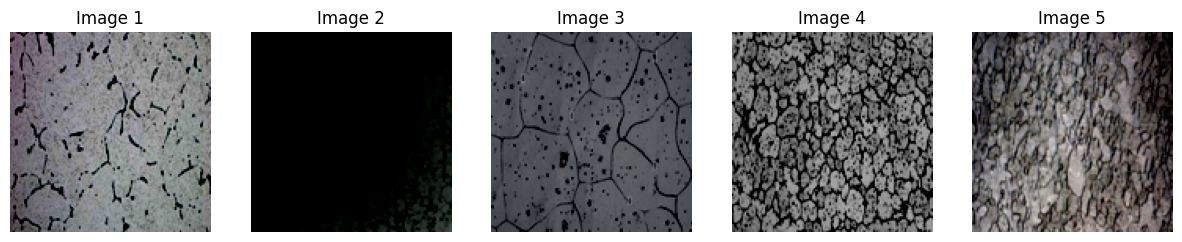

In [96]:
import matplotlib.pyplot as plt

# Visualize some of the loaded images
num_images_to_visualize = 5

plt.figure(figsize=(15, 5))
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(image_data[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()


In [102]:
print(image_data[0])

[[[ 0.37254902  0.28627451  0.34901961]
  [ 0.37254902  0.28627451  0.34901961]
  [ 0.41960784  0.3254902   0.39607843]
  ...
  [ 0.50588235  0.50588235  0.50588235]
  [ 0.52156863  0.52156863  0.52156863]
  [ 0.56078431  0.5372549   0.54509804]]

 [[ 0.31764706  0.24705882  0.30980392]
  [ 0.34901961  0.2627451   0.3254902 ]
  [ 0.44313725  0.34901961  0.41960784]
  ...
  [ 0.54509804  0.54509804  0.54509804]
  [ 0.55294118  0.54509804  0.54509804]
  [ 0.54509804  0.51372549  0.52156863]]

 [[ 0.38823529  0.34117647  0.39607843]
  [ 0.37254902  0.30980392  0.36470588]
  [ 0.40392157  0.3254902   0.38823529]
  ...
  [ 0.52156863  0.52156863  0.52156863]
  [ 0.58431373  0.57647059  0.58431373]
  [ 0.56862745  0.5372549   0.54509804]]

 ...

 [[ 0.2         0.16862745  0.17647059]
  [ 0.28627451  0.25490196  0.2627451 ]
  [ 0.37254902  0.34117647  0.34901961]
  ...
  [ 0.12941176  0.12941176  0.12941176]
  [ 0.51372549  0.50588235  0.51372549]
  [ 0.43529412  0.41176471  0.41960784]]

 [

In [97]:
# Check if composition data and image data have the same length
if len(normalized_composition_data) != len(image_data):
    print("The length of composition data and image data does not match.")

# Compare some samples of composition data and corresponding images
for i in range(min(len(normalized_composition_data), len(image_data))):
    print(f"Sample {i + 1} - Composition: {normalized_composition_data[i]}")
    # Display the image or its properties here
    print("")

# Compare the first few composition values and corresponding images
num_samples_to_compare = 5
for i in range(num_samples_to_compare):
    print(f"Sample {i + 1} - Composition: {normalized_composition_data[i]}")
    # Display the image or its properties here
    print("")


Sample 1 - Composition: [ 1.          0.74789916 -0.69811321  0.90322581 -0.63636364  0.31818182
  0.6         0.28695652 -1.         -1.         -1.         -1.        ]

Sample 2 - Composition: [-0.24528302 -0.93277311 -0.74528302 -0.5483871  -0.45454545  0.09090909
  0.6         0.          0.         -1.         -1.         -1.        ]

Sample 3 - Composition: [-0.81132075 -0.99579832 -0.74528302 -0.06451613  0.63636364 -0.13636364
 -0.6        -0.26956522  0.         -1.         -1.         -1.        ]

Sample 4 - Composition: [-0.01886792 -0.97478992 -0.69811321 -0.12903226  0.63636364  0.31818182
 -0.44       -0.2173913  -0.06666667 -1.         -1.         -1.        ]

Sample 5 - Composition: [ 0.32075472 -0.21848739 -0.88679245  0.58064516 -0.81818182 -0.36363636
  0.6         0.04347826 -1.         -1.         -1.         -1.        ]

Sample 6 - Composition: [-0.81132075  0.45378151 -0.93396226  0.48387097 -0.81818182 -0.72727273
 -0.52        0.07826087 -0.13333333 -0.5  

In [98]:
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, Flatten
from tensorflow.keras.models import Model

# Define input layer for composition data
composition_input = Input(shape=(normalized_composition_data.shape[1],))

# Define GeneratorNetwork model
def GeneratorNetwork(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(image_height * image_width * num_channels, activation='tanh')(x)  # Use tanh activation for better image generation
    gen_output = Reshape((image_height, image_width, num_channels))(x)
    return gen_output

# Define DiscriminatorNetwork model
def DiscriminatorNetwork(inputs):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    disc_output = Dense(1, activation='sigmoid')(x)
    return disc_output

# Define generator model
gen_output = GeneratorNetwork(composition_input)

# Define discriminator model for real images
disc_output_real = DiscriminatorNetwork(gen_output)  # Use gen_output as input

# Define discriminator model for generated images
disc_output_generated = DiscriminatorNetwork(gen_output)  # Use gen_output as input

# Define combined cGAN model
cGAN = Model(inputs=composition_input, outputs=[disc_output_real, disc_output_generated])

# Compile cGAN with appropriate loss functions
cGAN.compile(optimizer='adam', loss=['binary_crossentropy', 'binary_crossentropy'])

# Train the cGAN with composition data
cGAN.fit(normalized_composition_data, [real_labels, fake_labels])


3/3 [==============================] - 14s 3s/step - loss: 0.6481 - dense_77_loss: 0.3216 - dense_79_loss: 0.3265


c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step


c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step


c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step


c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step


c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\rhkr3\anaconda3\envs\py3.8\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step


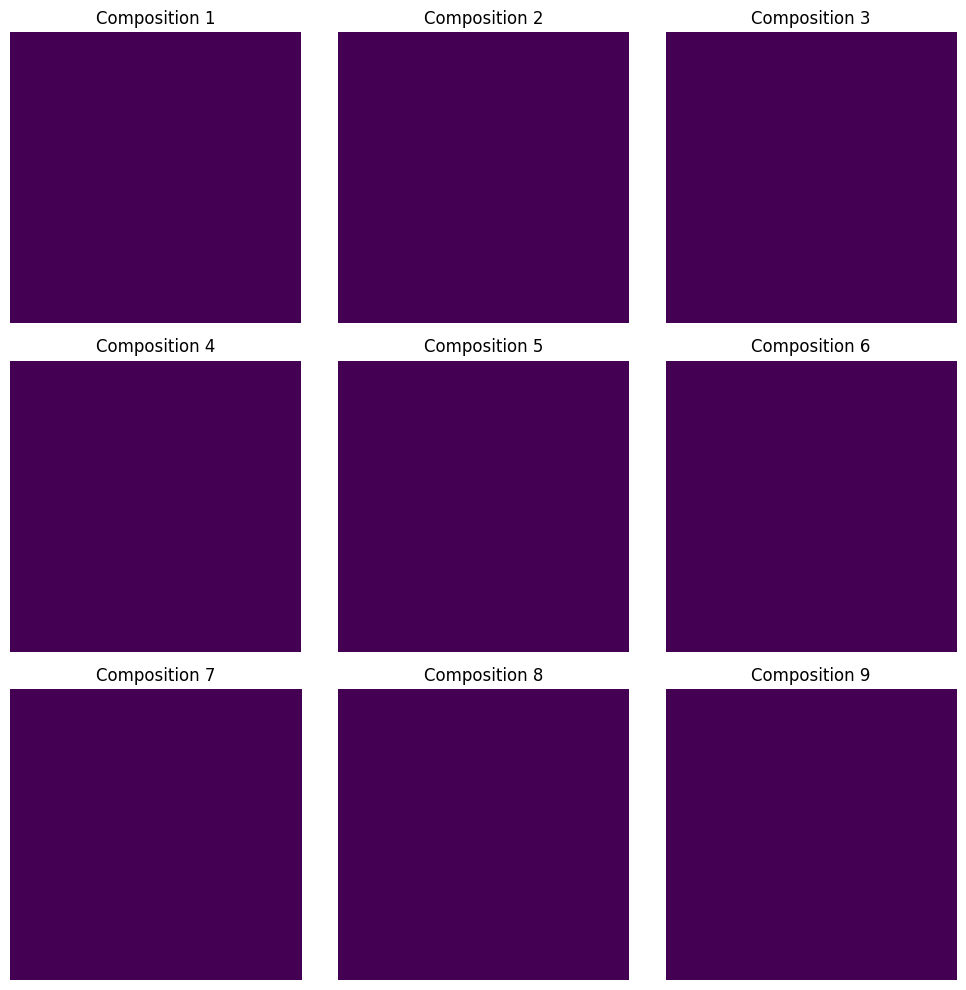

In [100]:
# 생성된 이미지 시각화
plt.figure(figsize=(10, 10))
for i, composition in enumerate(desired_compositions):
    normalized_desired_composition = scaler.transform([composition])
    generated_images = cGAN.predict(normalized_desired_composition)
    generated_image = generated_images[0]
    generated_image = (generated_image + 1) / 2.0
    
    plt.subplot(3, 3, i+1)
    plt.imshow(generated_image)
    plt.title(f"Composition {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [58]:
print("Normalized Composition Data Shape:", normalized_composition_data.shape)
print("Image Data Shape:", image_data.shape)

Normalized Composition Data Shape: (69, 12)
Image Data Shape: (69, 128, 128, 3)


In [59]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Reshape, Conv2D, Flatten
from tensorflow.keras.models import Model

# Define input layers
composition_input = Input(shape=(normalized_composition_data.shape[1],))
noise_input = Input(shape=(latent_dim,))
image_input = Input(shape=(image_height, image_width, num_channels))

In [61]:
print(composition_input)
print(noise_input)
print(image_input)

KerasTensor(type_spec=TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_22'), name='input_22', description="created by layer 'input_22'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='input_23'), name='input_23', description="created by layer 'input_23'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_24'), name='input_24', description="created by layer 'input_24'")


In [63]:
# Define GeneratorNetwork model
def GeneratorNetwork(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(image_height * image_width * num_channels, activation='sigmoid')(x)
    gen_output = Reshape((image_height, image_width, num_channels))(x)
    return gen_output

# Define DiscriminatorNetwork model
def DiscriminatorNetwork(inputs):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    disc_output = Dense(1, activation='sigmoid')(x)
    return disc_output

In [64]:
df

,Cr,Cu,Fe,Mg,Mn,Si,Ti,Zn,Zr,Ni,V,O
0,0.265,2.100,0.200,3.00,0.100,0.175,0.100,7.40,0.000,0.0,0.0,0.0
1,0.100,0.100,0.175,0.75,0.150,0.150,0.100,5.75,0.150,0.0,0.0,0.0
2,0.025,0.025,0.175,1.50,0.450,0.125,0.025,4.20,0.150,0.0,0.0,0.0
3,0.130,0.050,0.200,1.40,0.450,0.175,0.035,4.50,0.140,0.0,0.0,0.0
4,0.175,0.950,0.100,2.50,0.050,0.100,0.100,6.00,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.150,1.600,0.060,2.20,0.050,0.050,0.030,7.85,0.000,0.0,0.0,0.0
65,0.020,2.300,0.045,2.05,0.025,0.030,0.030,8.00,0.115,0.0,0.0,0.0
66,0.160,1.750,0.075,2.25,0.100,0.060,0.125,8.10,0.125,0.0,0.0,0.0
67,0.000,1.750,0.075,2.25,0.100,0.060,0.125,8.10,0.125,0.0,0.0,0.0


In [54]:






# Define generator model
gen_input = Concatenate()([composition_input, noise_input])
gen_output = GeneratorNetwork(gen_input)

# Define discriminator model
disc_output_real = DiscriminatorNetwork(image_input)
disc_output_generated = DiscriminatorNetwork(gen_output)

# Define combined cGAN model
cGAN = Model(inputs=[composition_input, noise_input, image_input], outputs=[disc_output_real, disc_output_generated])

# Compile cGAN with appropriate loss functions
cGAN.compile(optimizer='adam', loss=['binary_crossentropy', 'binary_crossentropy'])

# Train the cGAN with composition, noise, and image inputs
num_samples = len(normalized_composition_data)
latent_dim = 100
noise_data = np.random.normal(0, 1, (num_samples, latent_dim))
num_samples = len(image_data)  # Use the number of image samples
real_labels = np.ones((num_samples, 1))  # Label 1 for real images
fake_labels = np.zeros((num_samples, 1))  # Label 0 for generated images

cGAN.fit([normalized_composition_data, noise_data, image_data], [real_labels, fake_labels])


3/3 [==============================] - 22s 4s/step - loss: 0.6402 - dense_45_loss: 0.3128 - dense_47_loss: 0.3274


In [57]:
# Reshape the generated_images to match the expected shape (num_samples, image_height, image_width, num_channels)
generated_images_reshaped = generated_images.reshape((num_samples, image_height, image_width, num_channels))

# Visualize the first 5 generated images
num_images_to_visualize = 5
visualize_images(generated_images_reshaped[:num_images_to_visualize])


ValueError: cannot reshape array of size 69 into shape (69,128,128,3)

In [40]:
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model

# 이미지 크기 설정
image_height = 128
image_width = 128
num_channels = 3

latent_dim = 100  # Latent dimension for noise data
num_samples = len(normalized_composition_data)  # Number of samples in your dataset

# Generate random noise data
noise_data = np.random.randn(num_samples, latent_dim)


# Load and preprocess image data
image_paths = glob.glob('./Al_data/images/*.*')
image_data = []
for path in image_paths:
    img = Image.open(path)
    img = img.resize((image_width, image_height))  # Resize image to desired dimensions
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    image_data.append(img)

image_data = np.array(image_data)



In [41]:
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Flatten

# Generate real_labels for discriminator
real_labels = np.ones((num_samples, 1))  # Label 1 for real images

# Generate fake_labels for discriminator
fake_labels = np.zeros((num_samples, 1))  # Label 0 for generated images

# Train the cGAN with composition, noise, and image inputs
cGAN.fit([normalized_composition_data, noise_data, image_data], [real_labels, fake_labels])


# Define input layers
composition_input = Input(shape=(normalized_composition_data.shape[1],))
noise_input = Input(shape=(latent_dim,))
image_input = Input(shape=(image_height, image_width, num_channels))

# Define GeneratorNetwork model
def GeneratorNetwork(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(image_height * image_width * num_channels, activation='sigmoid')(x)
    gen_output = Reshape((image_height, image_width, num_channels))(x)
    return gen_output

# Define DiscriminatorNetwork model
def DiscriminatorNetwork(inputs):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    disc_output = Dense(1, activation='sigmoid')(x)
    return disc_output




3/3 [==============================] - 8s 3s/step - loss: 0.0000e+00 - dense_29_loss: 0.0000e+00 - dense_31_loss: 0.0000e+00


In [42]:
# Define generator model
gen_input = Concatenate()([composition_input, noise_input])
gen_output = GeneratorNetwork(gen_input)

# Define discriminator model
disc_output_real = DiscriminatorNetwork(image_input)
disc_output_generated = DiscriminatorNetwork(gen_output)

# Define combined cGAN model
cGAN = Model(inputs=[composition_input, noise_input, image_input], outputs=[disc_output_real, disc_output_generated])

# Compile cGAN with appropriate loss functions
cGAN.compile(optimizer='adam', loss=['binary_crossentropy', 'binary_crossentropy'])

# Train the cGAN with composition, noise, and image inputs
cGAN.fit([normalized_composition_data, noise_data, image_data], [real_labels, real_labels])

3/3 [==============================] - 16s 4s/step - loss: 0.6623 - dense_37_loss: 0.3531 - dense_39_loss: 0.3092


In [44]:
# Generate images using the trained generator
generated_images = cGAN.predict([normalized_composition_data, noise_data, image_data])[1]

# Visualize the generated images
import matplotlib.pyplot as plt

def visualize_images(images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()

# Reshape the generated_images to match the expected shape (height, width, channels)
generated_images_reshaped = generated_images.reshape((-1, image_height, image_width, num_channels))

# Visualize the first 5 generated images
visualize_images(generated_images_reshaped[:num_images_to_visualize])



3/3 [==============================] - 1s 226ms/step


ValueError: cannot reshape array of size 69 into shape (128,128,3)

In [29]:
import numpy as np
import glob
from PIL import Image
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Concatenate, Dense, Reshape, Conv2D, Flatten
from tensorflow.keras.models import Model

# Load and preprocess the dataframe
df = pd.read_excel('./Al_data/7000_Al.xlsx', header=0, sheet_name="Sheet3")
df = df.drop('class', axis=1)
df.fillna(0, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Normalize the composition data
scaler = StandardScaler()
normalized_composition_data = scaler.fit_transform(df)

# Define input layers
composition_input = Input(shape=(normalized_composition_data.shape[1],))
noise_input = Input(shape=(latent_dim,))
image_input = Input(shape=(image_height, image_width, num_channels))

# Define GeneratorNetwork model
def GeneratorNetwork(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(image_height * image_width * num_channels, activation='sigmoid')(x)
    gen_output = Reshape((image_height, image_width, num_channels))(x)
    return gen_output

# Define DiscriminatorNetwork model
def DiscriminatorNetwork(inputs):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    disc_output = Dense(1, activation='sigmoid')(x)
    return disc_output

# Define generator model
gen_input = Concatenate()([composition_input, noise_input])
gen_output = GeneratorNetwork(gen_input)

# Define discriminator model
disc_output_real = DiscriminatorNetwork(image_input)
disc_output_generated = DiscriminatorNetwork(gen_output)

# Define combined cGAN model
cGAN = Model(inputs=[composition_input, noise_input, image_input], outputs=[disc_output_real, disc_output_generated])

# Compile cGAN with appropriate loss functions
cGAN.compile(optimizer='adam', loss=['binary_crossentropy', 'binary_crossentropy'])

# Train the cGAN with composition, noise, and image inputs
num_samples = len(normalized_composition_data)
latent_dim = 100
noise_data = np.random.normal(0, 1, (num_samples, latent_dim))
num_samples = len(image_data)  # Use the number of image samples
real_labels = np.ones((num_samples, 1))  # Label 1 for real images
fake_labels = np.zeros((num_samples, 1))  # Label 0 for generated images



cGAN.fit([normalized_composition_data, noise_data, image_data], [real_labels, fake_labels])


3/3 [==============================] - 16s 3s/step - loss: 0.5783 - dense_29_loss: 0.2644 - dense_31_loss: 0.3139


3/3 [==============================] - 1s 239ms/step


TypeError: Invalid shape (1,) for image data

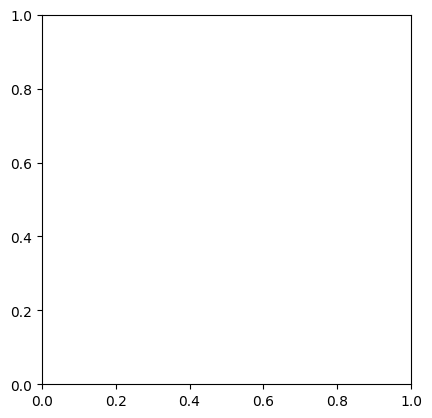

In [34]:
num_samples = len(normalized_composition_data)
latent_dim = 100
noise_data = np.random.normal(0, 1, (num_samples, latent_dim))
image_data = np.random.random((num_samples, image_height, image_width, num_channels))  # 임의의 이미지 데이터 생성


# Generate images using the trained generator
generated_images = cGAN.predict([normalized_composition_data, noise_data, image_data])[1]

# Visualize the generated images
import matplotlib.pyplot as plt

def visualize_images(images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()


# Visualize the first generated image
plt.imshow(generated_images[0])
plt.axis('off')
plt.show()
